In [0]:
import torch
from torch import nn
from torchvision import datasets , transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('mnist_data/' , download= True , train = True , transform=transform)

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw
Processing...
Done!


In [0]:
trainloader = torch.utils.data.DataLoader(trainset , batch_size= 64 , shuffle = True )

In [4]:
dataiter = iter(trainloader)
images , labels = dataiter.next()

In [5]:

images.shape

torch.Size([64, 1, 28, 28])

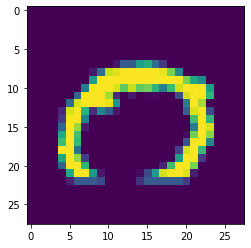

In [6]:
plt.imshow(images[1].numpy().squeeze())

In [0]:
input = images.reshape(images.shape[0] , 784)
def activation(x):
  return 1/(1+torch.exp(-x))

w1 = torch.randn([784 , 256])
b1 = torch.randn(256)

w2 = torch.randn([256 , 10])
b2 = torch.randn(10)

In [0]:
h = torch.sigmoid(torch.mm(input , w1) + b1)
output = activation(torch.mm(h,w2) + b2)

Defining neural network in pytorch

In [0]:
# building the neural network

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # Input to hidden layer
    self.hidden = nn.Linear( 786 , 256)
    # input ouput layer
    self.output = nn.Linear( 256 , 10)

    # activation function
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim = 1)

  def forward (self , x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)

    return x

In [0]:
model = Network()

In [0]:
# more cleaner code
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear( 786 , 256)
    self.ouput = nn.Linear( 256 , 10)

  def forward( self , x):

    x = F.Sigmoid(self.hidden(x))
    x = F.Softmax(self.output(x) , dim =1)

    return x

In [0]:
model1 = Network()

In [0]:
# building a neural network with input layer (784 neurons) , 1st hidden layer(128 neurons and relu) , 2nd hidden layer(64 neurons and relu) , output layer(10 and softmax)
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden1 = nn.Linear( 784 , 128)
    self.hidden2 = nn.Linear( 128 , 64)
    self.output = nn.Linear( 64 , 10)

  def forward(self ,x):

    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.softmax(self.output(x))

    return x

In [14]:
model2 = Network()
model2

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

Training Neural Network in pytorch

In [15]:
# without activation function on output
model = nn.Sequential( nn.Linear(784 , 128),
                       nn.ReLU(),
                       nn.Linear(128, 64),
                       nn.ReLU(),
                       nn.Linear(64 , 10),
                       )

criterion = nn.CrossEntropyLoss()
images = images.reshape(images.shape[0] , -1)

# forwar pass , get or logits
logits = model(images)
loss = criterion(logits , labels)
loss

tensor(2.2908, grad_fn=<NllLossBackward>)

In [16]:
# with activation function on output
model = nn.Sequential( nn.Linear(784 , 128),
                      nn.ReLU(),
                      nn.Linear(128 , 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criteria = nn.NLLLoss()  # with nn.logsoftmax we use 
images = images.reshape(images.shape[0] , -1)

logits = model(images)
loss = criteria (logits , labels)
loss

tensor(2.3077, grad_fn=<NllLossBackward>)

AutoGrad

In [0]:
x = torch.randn([2,2] , requires_grad=True)

In [0]:
y = x**2
z = y.mean()

In [19]:
z.backward()
z

tensor(0.5393, grad_fn=<MeanBackward0>)

In [20]:
print(x.grad)

tensor([[-0.2494, -0.4767],
        [-0.4713, -0.1665]])


In [21]:
print(x/2)

tensor([[-0.2494, -0.4767],
        [-0.4713, -0.1665]], grad_fn=<DivBackward0>)


In [22]:
#full neural network
from torch import optim

model = nn.Sequential( nn.Linear(784 , 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.Tanh(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimzer = optim.Adam(model.parameters() , lr = 0.001)

epochs = 5

for i in range(epochs):
  running_loss = 0
  for images , labels in trainloader:

    # flatting the image
    images = images.reshape(images.shape[0] , -1 )

    logits = model(images)
    loss = criterion(logits , labels)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()

    running_loss += loss.item()
  else:
    print(f"training loss : { running_loss / len(trainloader)}")

training loss : 0.3130239066975648
training loss : 0.11905299604876336
training loss : 0.08092027213295369
training loss : 0.059973950896944316
training loss : 0.045447419892980664


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()